In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

00000


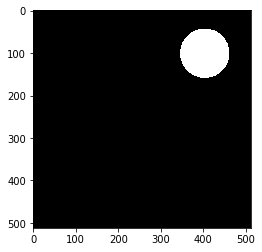

00001


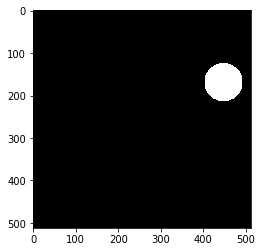

00002


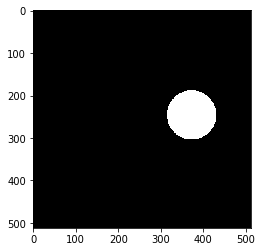

00003


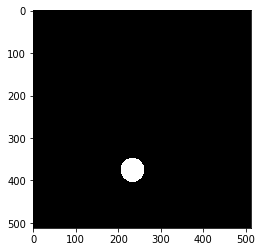

00004


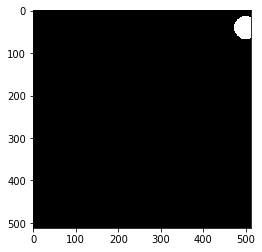

00005


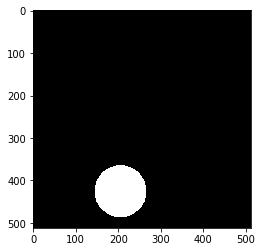

00006


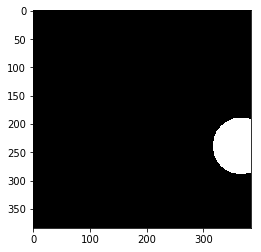

00007


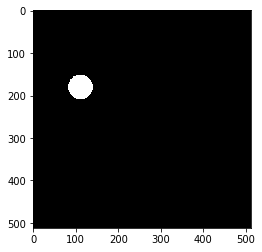

00008


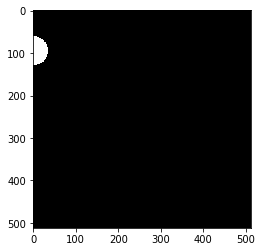

00009


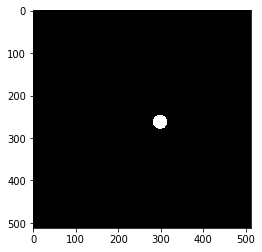

00010


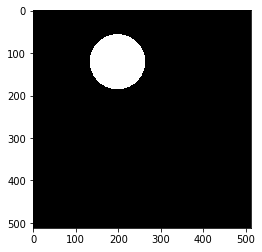

00011


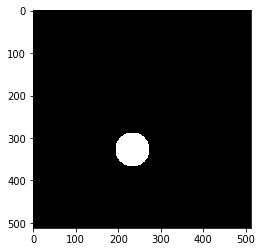

00012


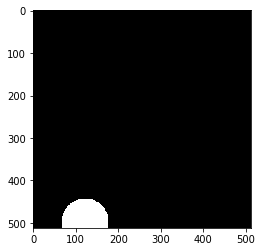

00013


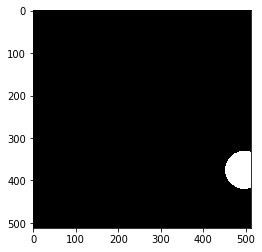

00014


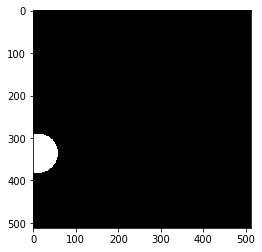

00015


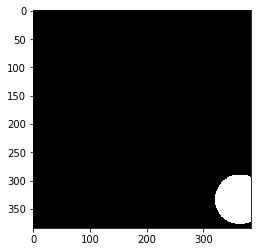

00016


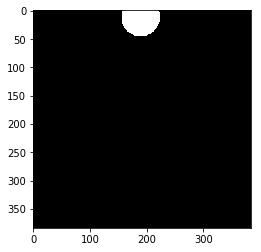

00017


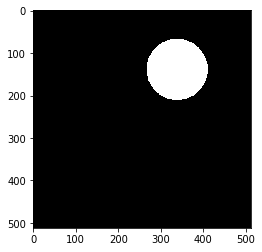

00018


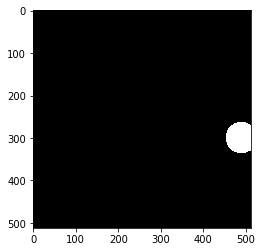

00019


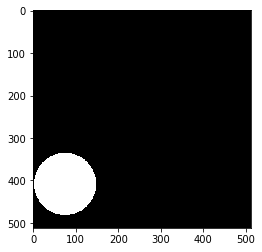

00020


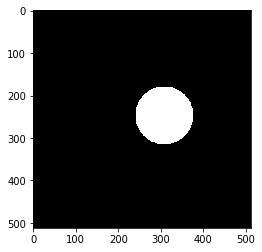

00021


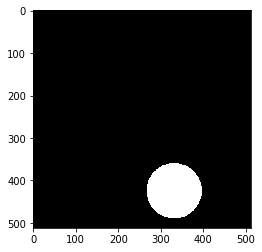

00022


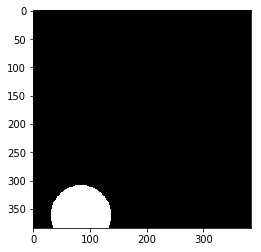

00023


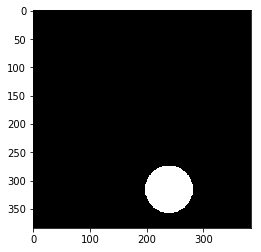

00024


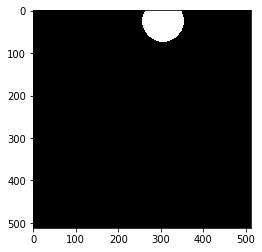

00025


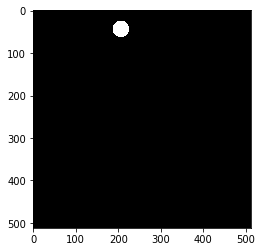

00026


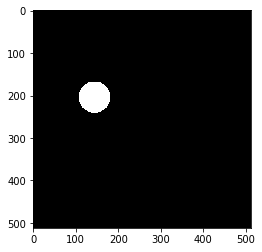

00027


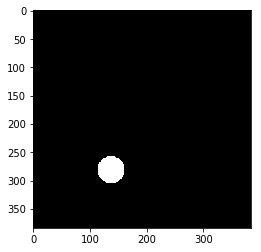

00028


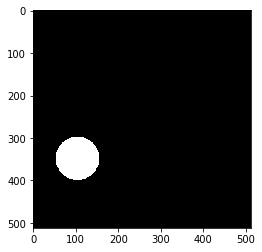

00029


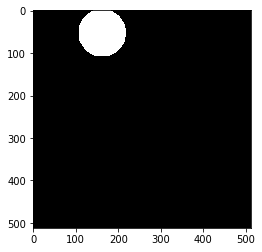

00030


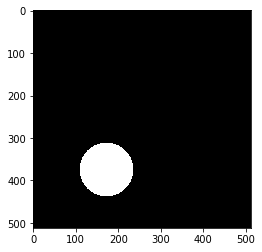

00031


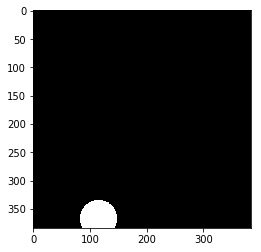

00032


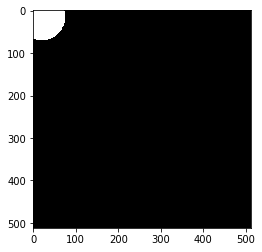

00033


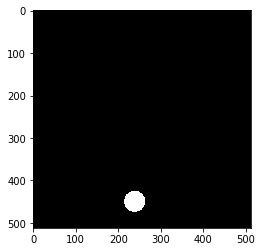

00034


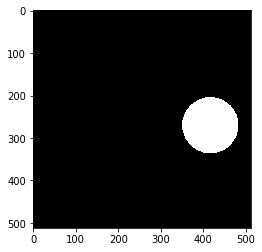

00035


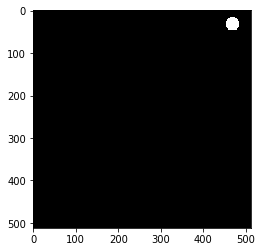

In [2]:
data = []
for i in range(36):
    tmp_npy = np.load("data/tumor-samples/sample-" + str(i).zfill(5)  + ".npy")
#     print("data/tumor-samples/sample-" + str(i).zfill(5)  + ".npy loaded...")
    data.append(tmp_npy)

data = np.array(data)

for i, x in enumerate(data):
    print(str(i).zfill(5))
    plt.imshow(x, cmap=cm.gray)
    plt.show()

In [3]:
mask = []
for d in data:
    xmin, xmax, ymin, ymax = np.inf, -1, np.inf, -1
    for i in range(d.shape[0]):
        for j in range(d.shape[1]):
            if (d[i][j]):
                if(i < xmin): xmin = i
                if(i > xmax): xmax = i
                if(j < ymin): ymin = j
                if(j > ymax): ymax = j
#     print(xmin, xmax, ymin, ymax)
#     print(xmax-xmin+1, ymax-ymin+1)

    mask.append(d[xmin:xmax+1, ymin:ymax+1])
    
mask = np.array(mask)

In [4]:
def get_patch(mask, patch_shape):
    """This is for generate corresponding patches.

    Args:
        mask (numpy.ndarray): A circle mask array.
        patch_shape (numpy.ndarray):
            The patch shape will larger than the bounding box shape.

    Returns:
        patch (numpy.ndarray)

    """
    xmin, xmax, ymin, ymax = np.inf, -1, np.inf, -1
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if (mask[i][j]):
                if(i < xmin): xmin = i
                if(i > xmax): xmax = i
                if(j < ymin): ymin = j
                if(j > ymax): ymax = j
    circle = mask[xmin:xmax+1, ymin:ymax+1]
    
    patch = np.zeros(patch_shape.shape)
    
    x_m = patch_shape.shape[0] // 2
    x_sm = circle.shape[0] // 2
    
    y_m = patch_shape.shape[1] // 2
    y_sm = circle.shape[1] // 2
    
    patch[x_m-x_sm : x_m-x_sm+circle.shape[0], y_m-y_sm : y_m-y_sm+circle.shape[1]] = circle[:,:]
    
    
    return patch

In [5]:
patch_shape = np.zeros((210,210))

In [6]:
mask[0].shape

(115, 115)

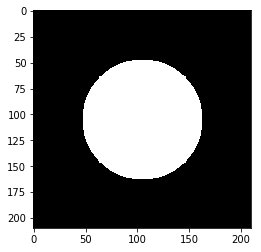

In [7]:
x_m = patch_shape.shape[0] // 2
x_sm = mask[0].shape[0] // 2

y_m = patch_shape.shape[1] // 2
y_sm = mask[0].shape[1] // 2

patch_shape[x_m-x_sm:x_m-x_sm+mask[0].shape[0], y_m-y_sm:y_m-y_sm+mask[0].shape[1]] = mask[0][:,:]
plt.imshow(patch_shape, cmap=cm.gray)

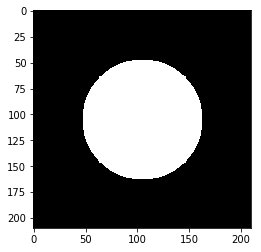

In [8]:
plt.imshow(get_patch(mask[0], np.zeros((210,210))), cmap=cm.gray)

In [9]:
def samePic(arr1, arr2):
    if(arr1.shape!=arr2.shape):
        return False
    else:
        for i in range(arr1.shape[0]):
            for j in range(arr2.shape[1]):
                if(arr1[i][j] != arr2[i][j]):
                    return False
        return True

00000
(210, 210)


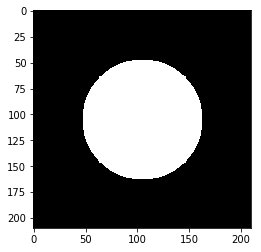

00001
(210, 210)


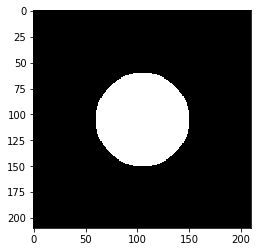

00002
(210, 210)


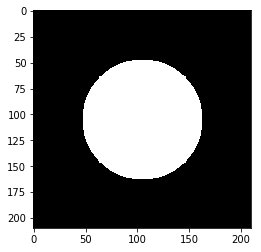

00003
(210, 210)


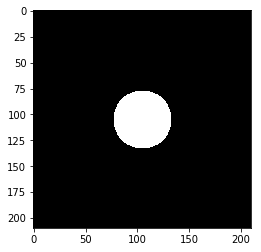

00004
(210, 210)


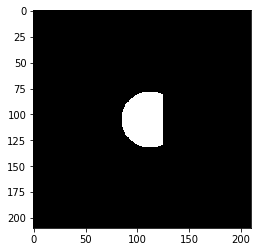

00005
(210, 210)


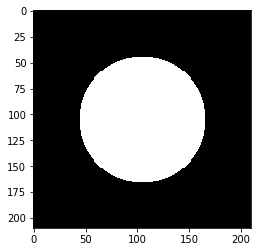

00006
(210, 210)


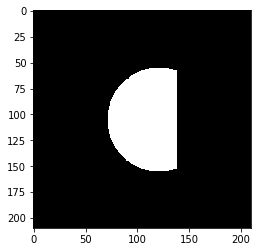

00007
(210, 210)


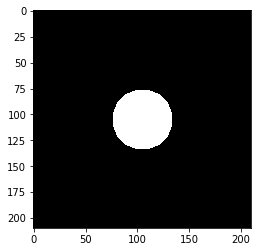

00008
(210, 210)


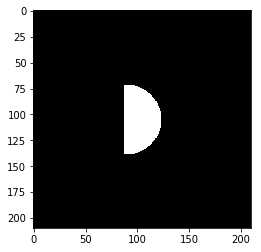

00009
(210, 210)


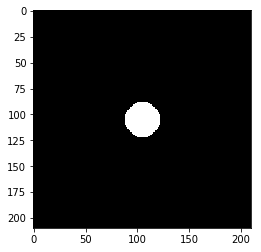

00010
(210, 210)


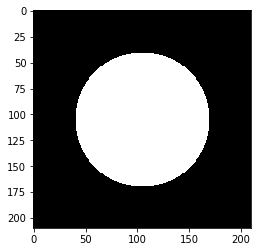

00011
(210, 210)


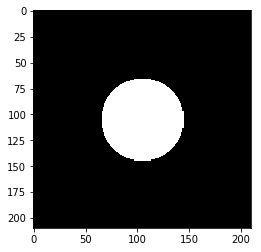

00012
(210, 210)


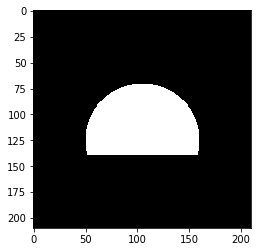

00013
(210, 210)


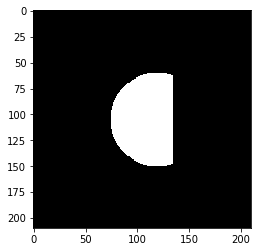

00014
(210, 210)


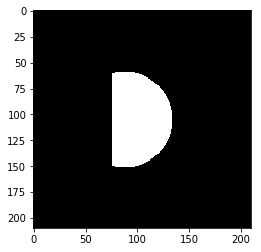

00015
(210, 210)


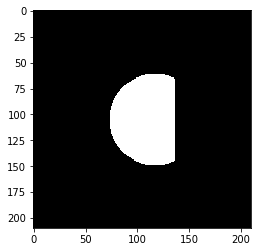

00016
(210, 210)


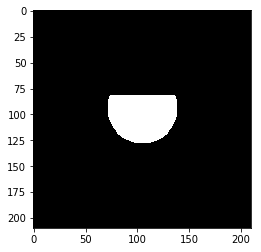

00017
(210, 210)


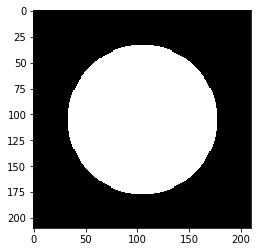

00018
(210, 210)


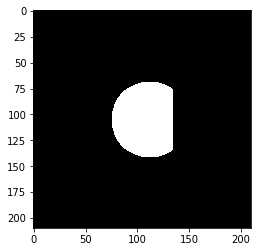

00019
(210, 210)


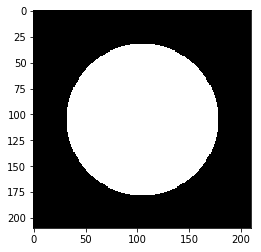

00020
(210, 210)


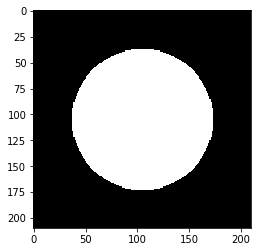

00021
(210, 210)


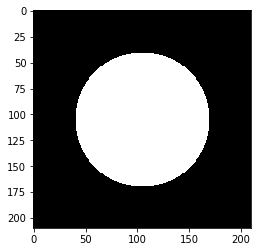

00022
(210, 210)


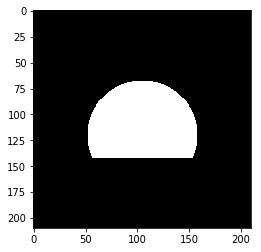

00023
(210, 210)


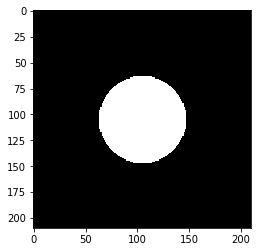

00024
(210, 210)


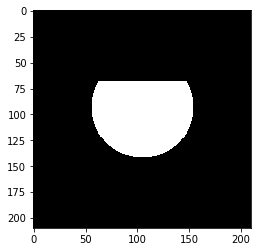

00025
(210, 210)


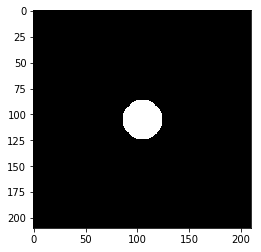

00026
(210, 210)


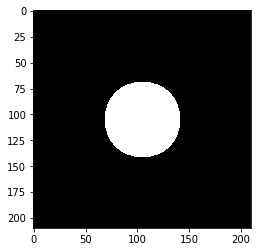

00027
(210, 210)


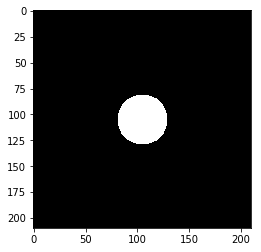

00028
(210, 210)


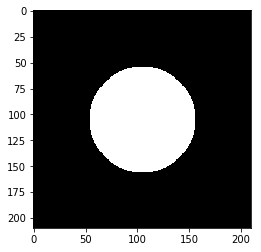

00029
(210, 210)


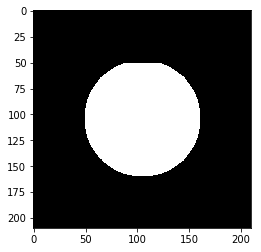

00030
(210, 210)


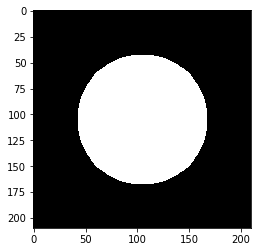

00031
(210, 210)


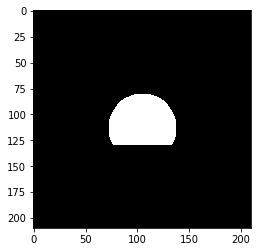

00032
(210, 210)


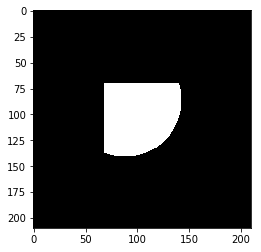

00033
(210, 210)


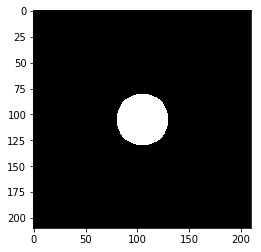

00034
(210, 210)


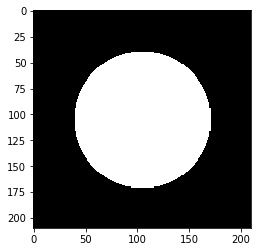

00035
(210, 210)


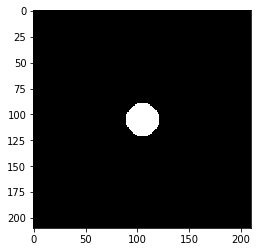

In [10]:
patch_ans = []
for i in range(36):
    tmp_npy = np.load("data/tumor-samples/sample-" + str(i).zfill(5)  + "-patch.npy")
#     print("data/tumor-samples/sample-" + str(i).zfill(5)  + ".npy loaded...")
    patch_ans.append(tmp_npy)

patch_ans = np.array(patch_ans)

for i, x in enumerate(patch_ans):
    print(str(i).zfill(5))
    print(x.shape)
    plt.imshow(x, cmap=cm.gray)
    plt.show()

In [11]:
for i in range(36):
    print(samePic(get_patch(mask[i],patch_shape) , patch_ans[i]))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
